Made by Ben Platt

In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [63]:
len(df)

902

In [8]:
df['RD'] = df['RS'] - df['RA']

In [9]:
df = df[df.Year < 2002]

In [14]:
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt

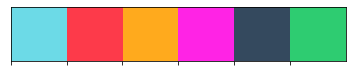

In [16]:
flatui = ["#6cdae7", "#fd3a4a", "#ffaa1d", "#ff23e5", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())



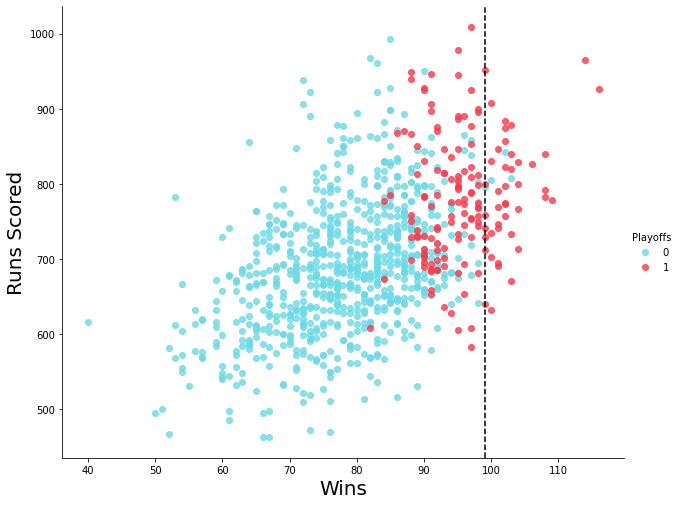

In [26]:
sns.lmplot(x = 'W', y = 'RS', fit_reg = False, hue = 'Playoffs', data = df, height = 7, aspect = 1.25)
plt.xlabel('Wins', fontsize = 20)
plt.ylabel('Runs Scored', fontsize = 20)
plt.axvline(99, 0, 1, color = 'Black', ls = '--')
plt.show()

In [27]:
import numpy as np

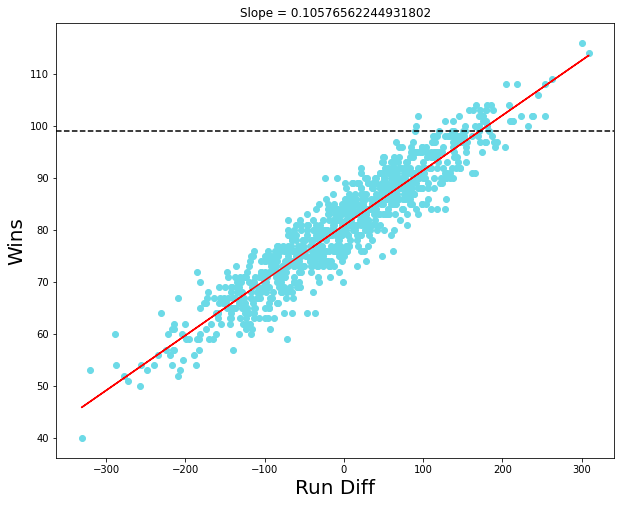

In [29]:
x = np.array(df.RD)
y = np.array(df.W)

slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

plt.figure(figsize=(10,8))
plt.scatter(x, y)

plt.plot(x, abline_values, 'r')
plt.title('Slope = %s' % (slope), fontsize = 12)
plt.xlabel("Run Diff", fontsize = 20)
plt.ylabel("Wins", fontsize = 20)
plt.axhline(99, 0, 1, color = 'k', ls = '--')

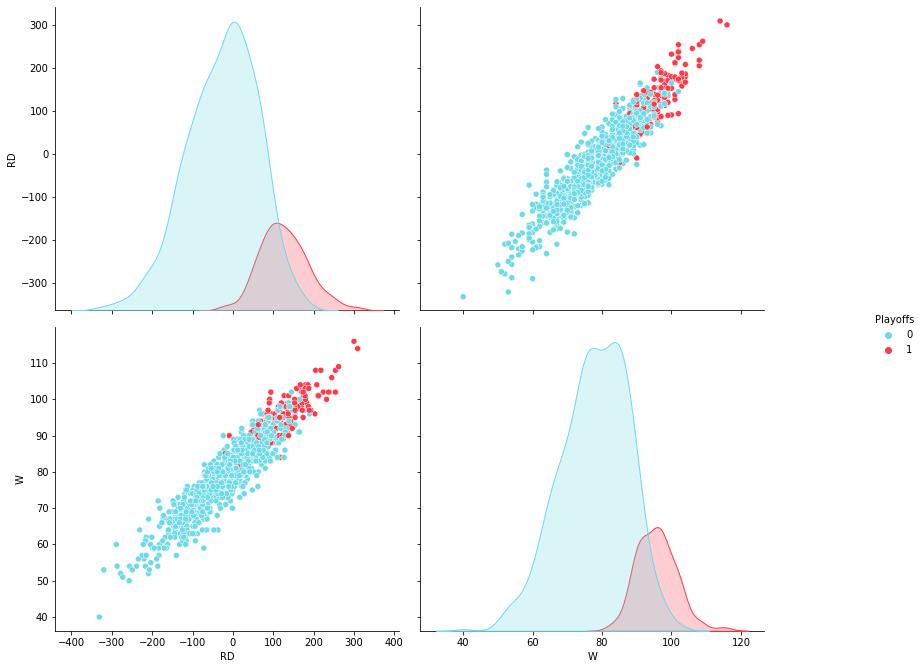

In [30]:
corrcheck = df[['RD', 'W', 'Playoffs']].copy()
g = sns.pairplot(corrcheck, hue = 'Playoffs', vars = ['RD', 'W'])
g.fig.set_size_inches(14, 10)

In [31]:
corrcheck.corr(method='pearson')

,RD,W,Playoffs
RD,1.000000,0.938515,0.566274
W,0.938515,1.000000,0.588978
Playoffs,0.566274,0.588978,1.000000


In [35]:
podesta = df[['OBP','SLG','BA','RS']]

In [36]:
podesta.corr(method='pearson')

,OBP,SLG,BA,RS
OBP,1.000000,0.806154,0.854055,0.904909
SLG,0.806154,1.000000,0.814068,0.926384
BA,0.854055,0.814068,1.000000,0.831625
RS,0.904909,0.926384,0.831625,1.000000


In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [43]:
moneyball = df.dropna()

In [44]:
X = moneyball.iloc[:, 6:9]
y = moneyball.iloc[:, -1]

bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

print(featureScores.nlargest(3, 'Score'))

  Feature     Score
1     SLG  0.008951
0     OBP  0.006262
2      BA  0.004577


In [45]:
from sklearn.ensemble import ExtraTreesClassifier

[0.33464831 0.35089363 0.31445807]


Text(0, 0.5, 'Statistic')

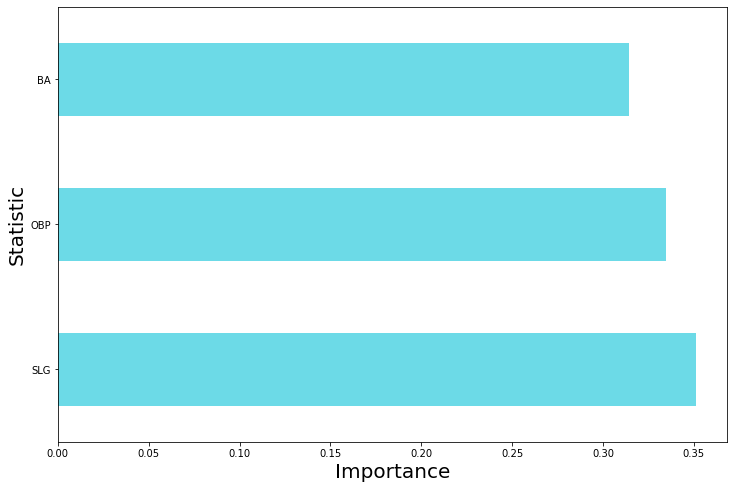

In [46]:
X = moneyball.iloc[:, 6:9]
y = moneyball.iloc[:, -1]

model = ExtraTreesClassifier()
model.fit(X, y)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(3).plot(kind='barh', figsize = (12, 8))

plt.xlabel('Importance', fontsize = 20)
plt.ylabel('Statistic', fontsize = 20)

In [50]:
from sklearn.linear_model import LinearRegression

In [54]:
X = df[['OBP','SLG']].values
y = df[['RS']].values 
Runs = LinearRegression()
Runs.fit(X, y)

print(Runs.intercept_)
print(Runs.coef_)

[-804.62706106]
[[2737.76802227 1584.90860546]]


In [55]:
# RS = -804.627 + (2737.768 X (OBP)) + (1584.909 X (SLG))

In [57]:
x = moneyball[['OOBP', 'OSLG']].values
y = moneyball[['RA']].values

RunsAllowed = LinearRegression()
RunsAllowed.fit(x, y)

print(RunsAllowed.intercept_)
print(RunsAllowed.coef_)

[-775.16234861]
[[3225.00378812 1106.50390975]]


In [58]:
# RA = -775.162 + (3225,004 X (OOBP)) + (1106.504 X (OSLG))

In [59]:
x = moneyball[['RD']].values
y = moneyball[['W']].values

Wins = LinearRegression()
Wins.fit(x, y)

print(Wins.intercept_)
print(Wins.coef_)

[84.09190385]
[[0.08469339]]


In [60]:
# W = 84.092 + (0.085 X (RD))

In [61]:
Runs.predict([[0.339, 0.430]])

array([[804.98699884]])

In [62]:
RunsAllowed.predict([[0.307, 0.373]])

array([[627.63977268]])